## Load libraries

In [ ]:
# tensorflow backend
print('tensorflow backend')
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
print('vae stuff')
from chemvae.vae_utils import VAEUtils
# import scientific py
print('iport scientific py')
import numpy as np
import pandas as pd
# rdkit stuff
print('rdkit stuff')
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
print('plotting stuff')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np 

import pandas as pd

In [ ]:
vae = VAEUtils(directory='models/zinc_properties')

## Load smiles

In [9]:
from rdkit.Chem import SDMolSupplier, MolToSmiles
import pandas as pd

In [13]:
smiles_group = []
df = pd.read_csv('./data/mao/mao_smiles.csv')
smiles_group = df['0'].values.tolist()

maoData = SDMolSupplier('data/mao/maoAct.sd')
mao_activity = []
for mol in maoData:
    if '.' not in MolToSmiles(mol):
        mao_activity.append(int(mol.GetProp('Activity')))

print('# of mao activity data :', len(mao_activity))
print('molcule fetched:', len(smiles_group))
smiles_group = list(zip(smiles_group, mao_activity))

# of mao activity data : 1182
molcule fetched: 1182


## Load latent data

In [ ]:
print('fetching latent space group...')
latent_group = []
df = pd.read_csv('./data/mao/latent_group.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
for i in range(len(smiles_group)):
    points = list(map(float, df.loc[i, '0'].strip('[]').split(', ')))
    latent_group.append([points, df.loc[i, '1']])
print('# of fetched data:', len(latent_group))

print('(1/5) fetching rdk fp group...')
rdk_fp_group = []
df = pd.read_csv('./data/mao/batched_rdk_fp_group.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
for i in range(len(smiles_group)):
    points = list(map(int, df.loc[i, '0'].strip('[]').split(', ')))
    rdk_fp_group.append([points, df.loc[i, '1']])
print('# of fetched data:', len(rdk_fp_group))

print('(3/5) fetching pattern fp group...')
pattern_fp_group = []
df = pd.read_csv('./data/mao/batched_pattern_fp_group.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
for i in range(len(smiles_group)):
    points = list(map(float, df.loc[i, '0'].strip('[]').split(', ')))
    pattern_fp_group.append([points, df.loc[i, '1']])
print('# of fetched data:', len(pattern_fp_group))

print('(4/5) fetching layered fp group...')
layered_fp_group = []
df = pd.read_csv('./data/mao/batched_layered_fp_group.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
for i in range(len(smiles_group)):
    points = list(map(float, df.loc[i, '0'].strip('[]').split(', ')))
    layered_fp_group.append([points, df.loc[i, '1']])
print('# of fetched data:', len(layered_fp_group))

print('(5/5) fetching MACCSKeys fp group...')
MACCSKeys_fp_group = []
df = pd.read_csv('./data/mao/batched_MACCKeys_fp_group.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
for i in range(len(smiles_group)):
    points = list(map(float, df.loc[i, '0'].strip('[]').split(', ')))
    MACCSKeys_fp_group.append([points, df.loc[i, '1']])
print('# of fetched data:', len(MACCSKeys_fp_group))

## Build DimReduction Model

In [53]:
n_components = 2
model_pca = PCA(n_components=n_components)
model_tsne = TSNE(n_components=n_components)

## Train DimReduction Model

In [59]:
print('\r(1/2) {:30s}'.format('training latent pca...'))
points_latent_pca = model_pca.fit_transform([ points[0] for points in latent_group ])

print('\r(2/2) {:30s}'.format('training latent tsne...'))
points_latent_tsne = model_tsne.fit_transform([ points[0] for points in latent_group ])

print('\r(3/10) {:30s}'.format('training rdk fingerprint tsne...'))
points_rdk_fp_tsne = model_tsne.fit_transform([ points[0] for points in rdk_fp_group ])


print('\r(4/10) {:30s}'.format('training rdk fingerprint pca...'))
points_rdk_fp_pca = model_pca.fit_transform([ points[0] for points in rdk_fp_group ])

print('\r(5/10) {:30s}'.format('training pattern fingerprint tsne...'))
points_pattern_fp_tsne = model_tsne.fit_transform([ points[0] for points in pattern_fp_group ])

print('\r(6/10) {:30s}'.format('training pattern fingerprint pca...'))
points_pattern_fp_pca = model_pca.fit_transform([ points[0] for points in pattern_fp_group ])

print('\r(7/10) {:30s}'.format('training layered fingerprint tsne...'))
points_layered_fp_tsne = model_tsne.fit_transform([ points[0] for points in layered_fp_group ])

print('\r(8/10) {:30s}'.format('training layered fingerprint pca...'))
points_layered_fp_pca = model_pca.fit_transform([ points[0] for points in layered_fp_group ])

print('\r(9/10) {:30s}'.format('training MACCSKeys fingerprint tsne...'))
points_MACCSKeys_fp_tsne = model_tsne.fit_transform([ points[0] for points in MACCSKeys_fp_group ])

print('\r(10/10) {:30s}'.format('training MACCSKeys fingerprint pca...'))
points_MACCSKeys_fp_pca = model_pca.fit_transform([ points[0] for points in MACCSKeys_fp_group ])

(1/2) training latent pca...        
(2/2) training latent tsne...       
(3/10) training rdk fingerprint tsne...
(4/10) training rdk fingerprint pca...
(5/10) training pattern fingerprint tsne...
(6/10) training pattern fingerprint pca...
(7/10) training layered fingerprint tsne...
(8/10) training layered fingerprint pca...
(9/10) training MACCSKeys fingerprint tsne...
(10/10) training MACCSKeys fingerprint pca...


## Load coordinates

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [58]:
latent_target_group = mao_activity
print('data fetched:', len(latent_target_group))

print('(1/2) fetching latent space tsne points...')
points_latent_tsne = []
df = pd.read_csv('./data/mao/points_latent_tsne.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_latent_tsne = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_latent_tsne))

print('(2/2) fetching latent space pca points...')
points_latent_pca = []
df = pd.read_csv('./data/mao/points_latent_pca.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_latent_pca = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_latent_pca))

print('(3/10) fetching rdk fp tsne points...')
points_rdk_fp_tsne = []
df = pd.read_csv('./data/mao/batched_points_rdk_fp_tsne.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_rdk_fp_tsne = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_rdk_fp_tsne))

print('(4/10) fetching rdk fp pca points...')
points_rdk_fp_pca = []
df = pd.read_csv('./data/mao/batched_points_rdk_fp_pca.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_rdk_fp_pca = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_rdk_fp_pca))

print('(5/10) fetching pattern fp tsne points...')
points_pattern_fp_tsne = []
df = pd.read_csv('./data/mao/batched_points_pattern_fp_tsne.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_pattern_fp_tsne = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_pattern_fp_tsne))

print('(6/10) fetching pattern fp pca points...')
points_pattern_fp_pca = []
df = pd.read_csv('./data/mao/batched_points_pattern_fp_pca.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_pattern_fp_pca = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_pattern_fp_pca))

print('(7/10) fetching layered fp tsne points...')
points_layered_fp_tsne = []
df = pd.read_csv('./data/mao/batched_points_layered_fp_tsne.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_layered_fp_tsne = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_layered_fp_tsne))

print('(8/10) fetching layered fp pca points...')
points_layered_fp_pca = []
df = pd.read_csv('./data/mao/batched_points_layered_fp_pca.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_layered_fp_pca = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_layered_fp_pca))

print('(9/10) fetching MACCSKeys fp tsne points...')
points_MACCSKeys_fp_tsne = []
df = pd.read_csv('./data/mao/batched_points_MACCSKeys_fp_tsne.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_MACCSKeys_fp_tsne = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_MACCSKeys_fp_tsne))

print('(10/10) fetching MACCSKeys fp pca points...')
points_MACCSKeys_fp_pca = []
df = pd.read_csv('./data/mao/batched_points_MACCSKeys_fp_pca.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
points_MACCSKeys_fp_pca = df.values.tolist()[:len(smiles_group)]
print('data fetched:', len(points_MACCSKeys_fp_pca))

# sort loaded data
ltg = latent_target_group
sorted = list(zip(latent_target_group, points_latent_pca, points_latent_tsne))
sorted.sort(key=lambda x:x[0])
latent_target_group = list(np.array(sorted, dtype=object).T[0])
points_latent_pca = list(np.array(sorted, dtype=object).T[1])
points_latent_tsne = list(np.array(sorted, dtype=object).T[2])

sorted = list(zip(ltg, 
    points_rdk_fp_pca, points_rdk_fp_tsne, 
    points_layered_fp_pca, points_layered_fp_tsne, 
    points_pattern_fp_pca, points_pattern_fp_tsne, 
    points_MACCSKeys_fp_pca, points_MACCSKeys_fp_tsne))
sorted.sort(key=lambda x:x[0])
points_rdk_fp_pca = list(np.array(sorted, dtype=object).T[1])
points_rdk_fp_tsne = list(np.array(sorted, dtype=object).T[2])
points_layered_fp_pca = list(np.array(sorted, dtype=object).T[3])
points_layered_fp_tsne = list(np.array(sorted, dtype=object).T[4])
points_pattern_fp_pca = list(np.array(sorted, dtype=object).T[5])
points_pattern_fp_tsne = list(np.array(sorted, dtype=object).T[6])
points_MACCSKeys_fp_pca = list(np.array(sorted, dtype=object).T[7])
points_MACCSKeys_fp_tsne = list(np.array(sorted, dtype=object).T[8])

data fetched: 1182
(1/2) fetching latent space tsne points...
data fetched: 1182
(2/2) fetching latent space pca points...
data fetched: 1182
(3/10) fetching rdk fp tsne points...
data fetched: 1182
(4/10) fetching rdk fp pca points...
data fetched: 1182
(5/10) fetching pattern fp tsne points...
data fetched: 1182
(6/10) fetching pattern fp pca points...
data fetched: 1182
(7/10) fetching layered fp tsne points...
data fetched: 1182
(8/10) fetching layered fp pca points...
data fetched: 1182
(9/10) fetching MACCSKeys fp tsne points...
data fetched: 1182
(10/10) fetching MACCSKeys fp pca points...
data fetched: 1182


## Visualize the data

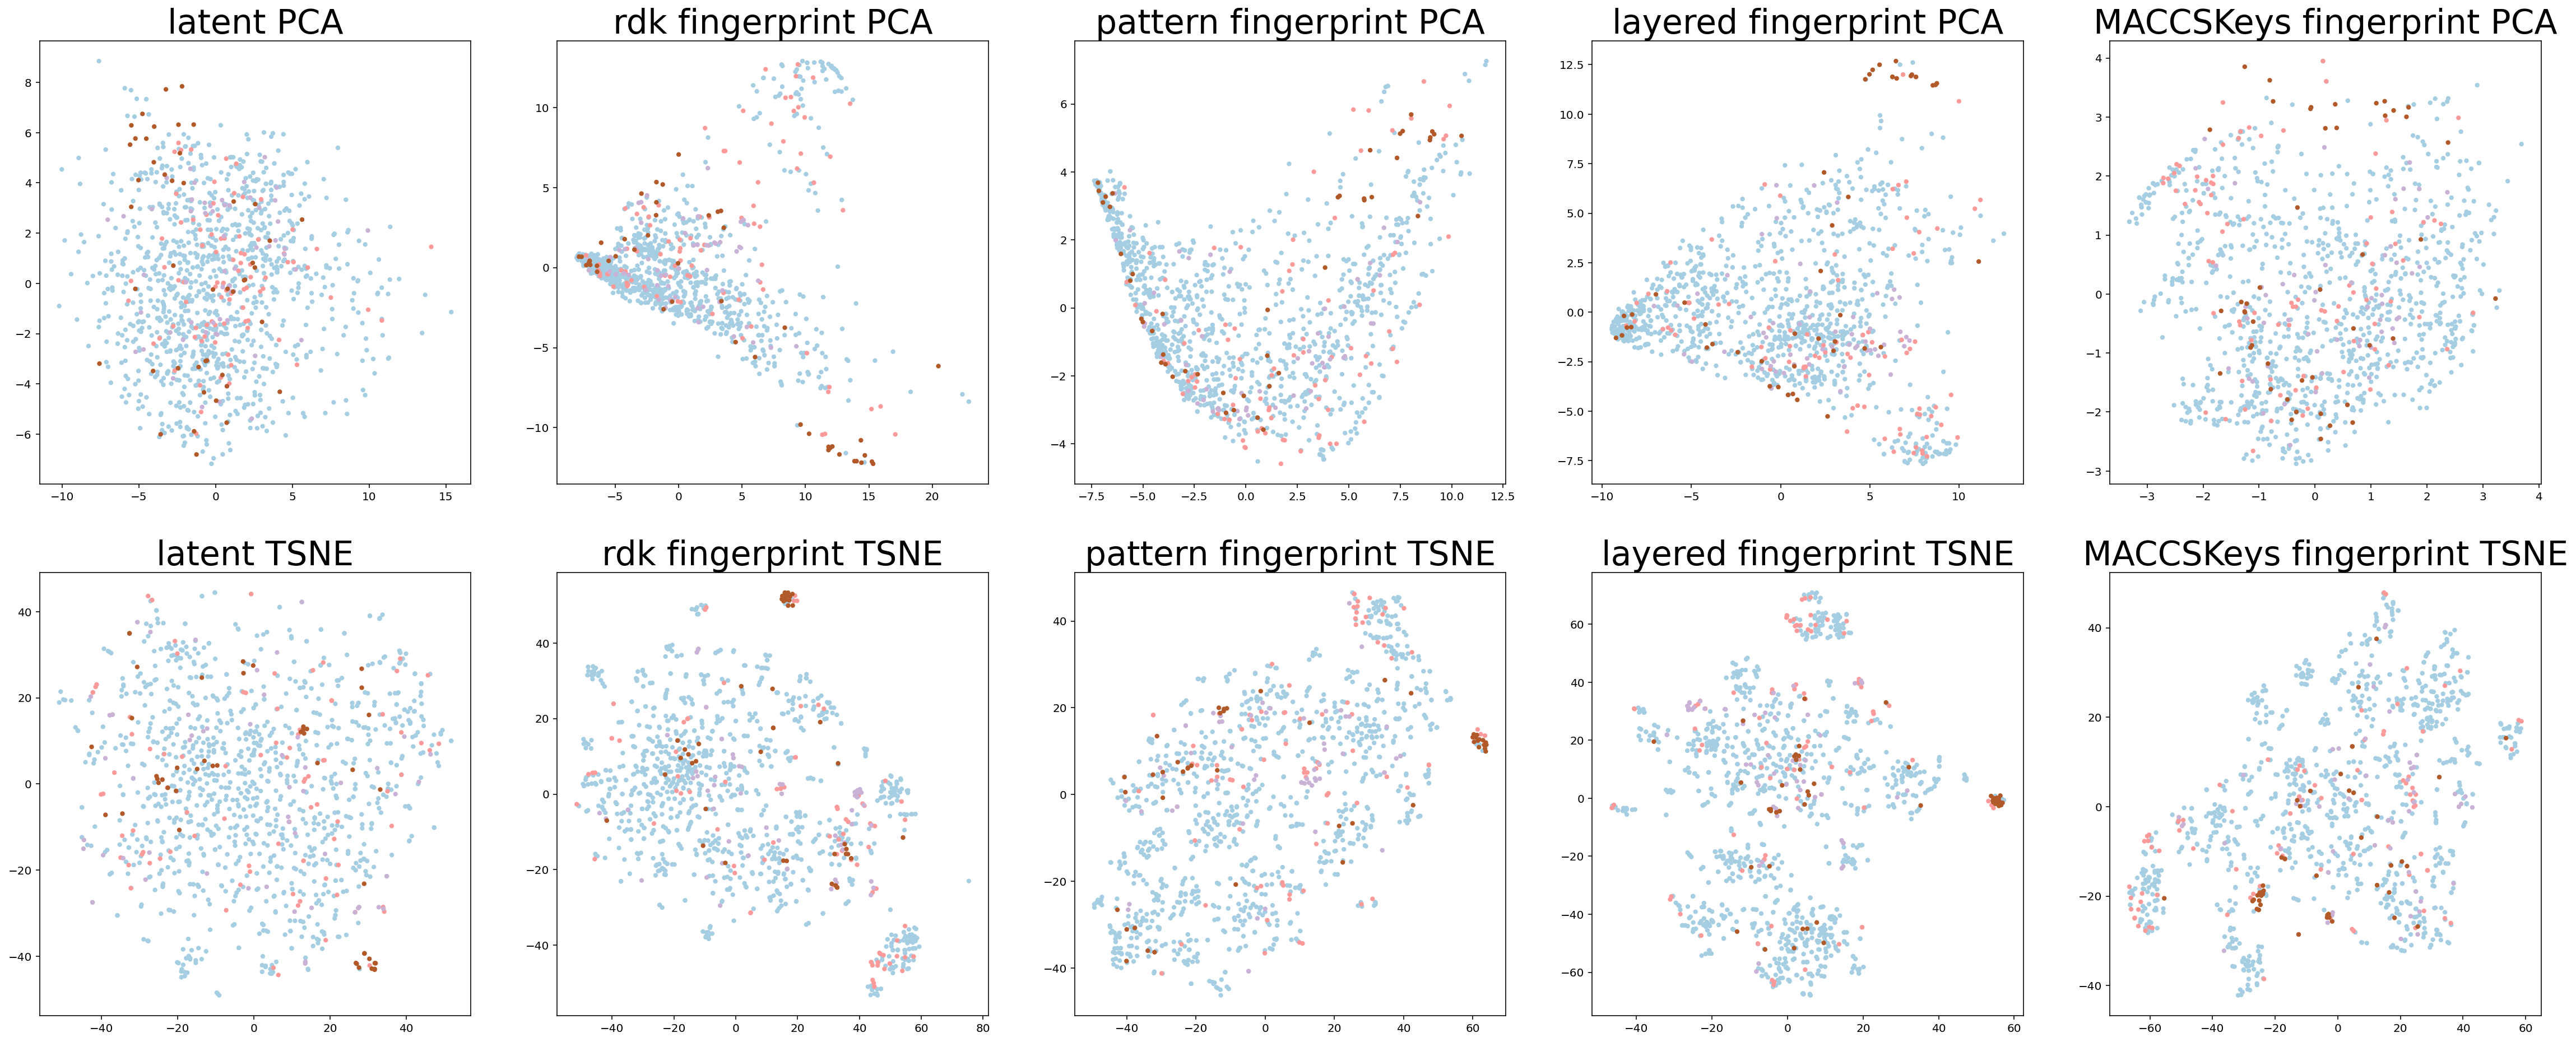

In [68]:
x1 = [ point[0] for point in points_latent_pca ]
y1 = [ point[1] for point in points_latent_pca ]

x2 = [ point[0] for point in points_latent_tsne ]
y2 = [ point[1] for point in points_latent_tsne ]

x3 = [ point[0] for point in points_rdk_fp_pca ]
y3 = [ point[1] for point in points_rdk_fp_pca ]

x4 = [ point[0] for point in points_rdk_fp_tsne ]
y4 = [ point[1] for point in points_rdk_fp_tsne ]

x5 = [ point[0] for point in points_pattern_fp_pca ]
y5 = [ point[1] for point in points_pattern_fp_pca ]

x6 = [ point[0] for point in points_pattern_fp_tsne ]
y6 = [ point[1] for point in points_pattern_fp_tsne ]

x7 = [ point[0] for point in points_layered_fp_pca ]
y7 = [ point[1] for point in points_layered_fp_pca ]

x8 = [ point[0] for point in points_layered_fp_tsne ]
y8 = [ point[1] for point in points_layered_fp_tsne ]

x9 = [ point[0] for point in points_MACCSKeys_fp_pca ]
y9 = [ point[1] for point in points_MACCSKeys_fp_pca ]

x10 = [ point[0] for point in points_MACCSKeys_fp_tsne ]
y10 = [ point[1] for point in points_MACCSKeys_fp_tsne ]

alpha = 1.0
size = 10
color = '#74b9ff'
bg_color = '#ffffff' #CAD3C8'
fontsize = 30

cmap = plt.cm.get_cmap('Paired', 4)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((40, 16))
plt.rcParams['axes.facecolor'] = bg_color

# plt.colorbar()

plt.subplot(251)
plt.scatter(x1, y1, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('latent PCA', fontsize=fontsize)

plt.subplot(256)
plt.scatter(x2, y2, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('latent TSNE', fontsize=fontsize)

plt.subplot(252)
plt.scatter(x3, y3, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('rdk fingerprint PCA', fontsize=fontsize)

plt.subplot(257)
plt.scatter(x4, y4, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('rdk fingerprint TSNE', fontsize=fontsize)

plt.subplot(253)
plt.scatter(x5, y5, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('pattern fingerprint PCA', fontsize=fontsize)

plt.subplot(258)
plt.scatter(x6, y6, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('pattern fingerprint TSNE', fontsize=fontsize)

plt.subplot(254)
plt.scatter(x7, y7, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('layered fingerprint PCA', fontsize=fontsize)

plt.subplot(259)
plt.scatter(x8, y8, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('layered fingerprint TSNE', fontsize=fontsize)

plt.subplot(255)
plt.scatter(x9, y9, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('MACCSKeys fingerprint PCA', fontsize=fontsize)

plt.subplot(2, 5, 10)
plt.scatter(x10, y10, c=latent_target_group, cmap=cmap, s=size, alpha=alpha)
plt.title('MACCSKeys fingerprint TSNE', fontsize=fontsize)

plt.show()

## Check clustered space in fingerprint TSNE

Text(0.5, 1.0, 'rdk fingerprint TSNE')

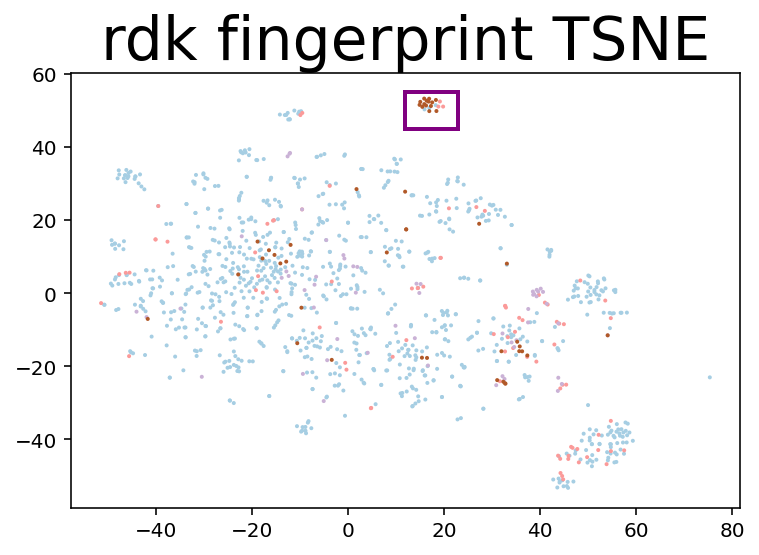

In [79]:
from matplotlib import patches

area1 = ((12, 55), (23, 45))
rect1 = patches.Rectangle(area1[0], area1[1][0] - area1[0][0], area1[1][1] - area1[0][1], fill=False, color='purple', linewidth=2)
plt.gca().add_patch(rect1)

plt.scatter(x4, y4, c=latent_target_group, cmap=cmap, s=1, alpha=alpha)
plt.title('rdk fingerprint TSNE', fontsize=fontsize)

[3, 3, 0, 14]
1182
# of activated molecule in area0 : 3
# of deactivated molecule in area1 : 3
# of activated molecule in area2 : 0
# of deactivated molecule in area3 : 14

<<molecule with activation 0>>


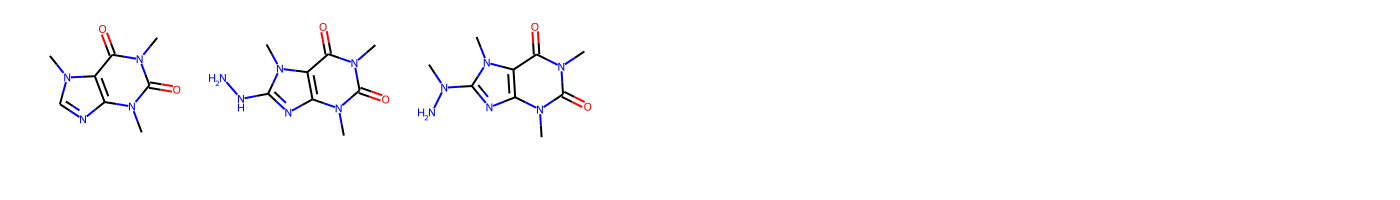

<<molecule with activation 1>>


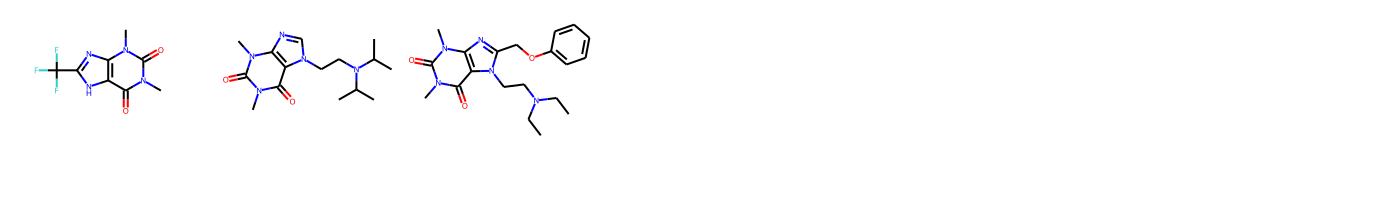

<<molecule with activation 3>>


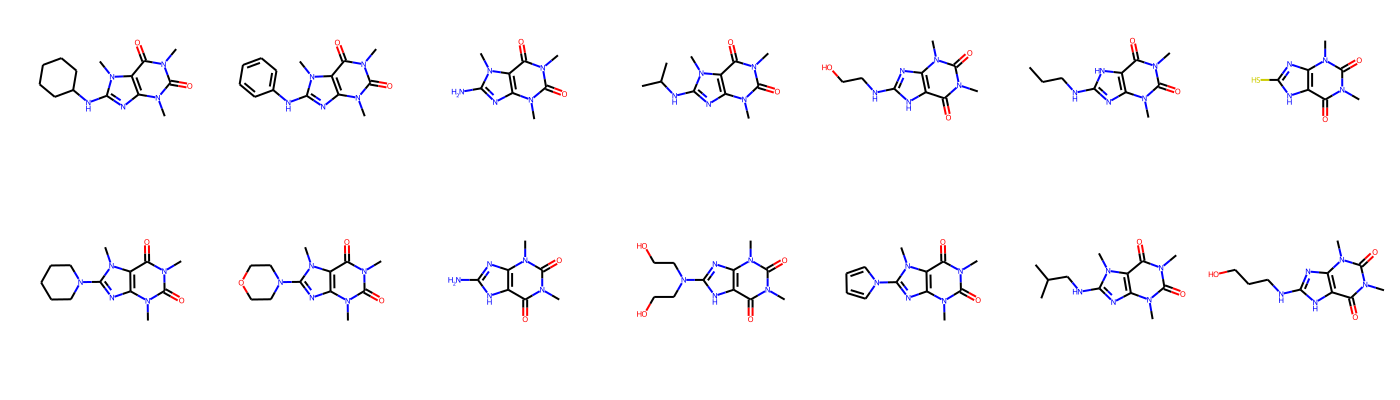

In [108]:
indexes1_extracted_latent_tsne = []
sum = [0, 0 , 0, 0]
for idx, point in enumerate(points_rdk_fp_tsne):
    if point[0] > area1[0][0] and point[0] < area1[1][0] and point[1] > area1[1][1] and point[1] < area1[0][1]:
        indexes1_extracted_latent_tsne.append(idx)
        sum[latent_target_group[idx]] += 1
        continue

df_area0 = pd.DataFrame([], columns=['smiles'])
df_area1 = pd.DataFrame([], columns=['smiles'])
df_area2 = pd.DataFrame([], columns=['smiles'])
df_area3 = pd.DataFrame([], columns=['smiles'])

for index in indexes1_extracted_latent_tsne:
    if latent_target_group[index] == 0:
        df_area0 = pd.concat((df_area0, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
    elif latent_target_group[index] == 1:
        df_area1 = pd.concat((df_area1, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
    elif latent_target_group[index] == 2:
        df_area2 = pd.concat((df_area2, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))
    else:
        df_area3 = pd.concat((df_area3, pd.DataFrame([Chem.MolFromSmiles(smiles_group[index][0])], columns=['smiles'])))

print('# of activated molecule in area0 :', len(df_area0))
print('# of deactivated molecule in area1 :', len(df_area1))
print('# of activated molecule in area2 :', len(df_area2))
print('# of deactivated molecule in area3 :', len(df_area3))

print('')
print('<<molecule with activation 0>>')
display(PandasTools.FrameToGridImage(df_area0, column='smiles', legendsCol='smiles', molsPerRow=7))
print('<<molecule with activation 1>>')
display(PandasTools.FrameToGridImage(df_area1, column='smiles', legendsCol='smiles', molsPerRow=7))
print('<<molecule with activation 3>>')
display(PandasTools.FrameToGridImage(df_area3, column='smiles', legendsCol='smiles', molsPerRow=7))